In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
from copy import deepcopy
from os.path import join, isdir, isfile, dirname, abspath
from os import listdir, getcwd
import re
from sys import stdout, getfilesystemencoding
from nilmtk.datastore import Key
from nilmtk.timeframe import TimeFrame
from nilmtk.measurement import LEVEL_NAMES
from nilm_metadata import convert_yaml_to_hdf5
from inspect import currentframe, getfile, getsourcefile
from copy import copy

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nilmtk import DataSet, TimeFrame
from nilmtk.disaggregate import CombinatorialOptimisation

In [5]:
train = DataSet('/nilmtk/data/ukdale.h5') #"iawe.h5")

In [6]:
test = copy(train)
print(train.buildings[1].elec)

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

In [7]:
elec = train.buildings[1].elec

In [8]:
building_2 = train.buildings[1]

In [9]:
print(elec)

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

In [10]:
top_k = elec.select_top_k(k=6)

53/53 ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

In [12]:
top_k

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])
  ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
)

In [13]:
elec.energy_per_meter().T

53/53 ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

,active,apparent,reactive
"(2, 1, UK-DALE)",NaN,300.367710,NaN
"(3, 1, UK-DALE)",NaN,164.491409,NaN
"(4, 1, UK-DALE)",68.972822,NaN,NaN
"(5, 1, UK-DALE)",503.035078,NaN,NaN
"(6, 1, UK-DALE)",295.585025,NaN,NaN
"(7, 1, UK-DALE)",199.289331,NaN,NaN
"(8, 1, UK-DALE)",NaN,372.418569,NaN
"(9, 1, UK-DALE)",302.348581,NaN,NaN
"(10, 1, UK-DALE)",270.362653,NaN,NaN
"(11, 1, UK-DALE)",161.878999,NaN,NaN


In [14]:
split_point = elec.train_test_split(0.5)

In [15]:
print(split_point)

2014-02-10 17:37:33.600000+00:00


In [16]:
elec.good_sections()

/nilmtk/nilmtk/metergroup.py:901: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warn("As a quick implementation we only get Good Sections from"


[TimeFrame(start='2012-11-09 22:28:23+00:00', end='2012-11-10 09:29:52+00:00', empty=False),
 TimeFrame(start='2012-11-10 09:32:12+00:00', end='2012-11-10 09:32:49+00:00', empty=False),
 TimeFrame(start='2012-11-10 09:34:58+00:00', end='2012-11-10 09:35:10+00:00', empty=False),
 TimeFrame(start='2012-11-10 09:38:44+00:00', end='2012-11-10 10:37:09+00:00', empty=False),
 TimeFrame(start='2012-11-10 10:39:46+00:00', end='2012-11-10 10:39:58+00:00', empty=False),
 TimeFrame(start='2012-11-10 10:44:59+00:00', end='2012-11-10 10:45:11+00:00', empty=False),
 TimeFrame(start='2012-11-10 10:47:47+00:00', end='2012-11-10 11:01:13+00:00', empty=False),
 TimeFrame(start='2012-11-10 11:07:35+00:00', end='2012-11-10 11:11:29+00:00', empty=False),
 TimeFrame(start='2012-11-10 11:13:35+00:00', end='2012-11-10 11:20:38+00:00', empty=False),
 TimeFrame(start='2012-11-10 11:24:27+00:00', end='2012-11-10 11:25:45+00:00', empty=False),
 TimeFrame(start='2012-11-10 11:29:57+00:00', end='2012-11-10 11:44:53

In [18]:
train.store.window = TimeFrame(start=None, end = split_point)
test.store.window = TimeFrame(start=split_point, end=None)

In [19]:
from nilmtk import DataSet, TimeFrame
from nilmtk.disaggregate import CombinatorialOptimisation

In [20]:
co = CombinatorialOptimisation()

In [21]:
co.train(top_k)

Training model for submeter 'ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])'
Training model for submeter 'ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])'
Training model for submeter 'ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])'
Done training!


In [22]:
co.model

[{'states': array([  0, 116, 184], dtype=int32),
  'training_metadata': ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])},
 {'states': array([   0,  170, 1874], dtype=int32),
  'training_metadata': ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])},
 {'states': array([ 0, 68, 85], dtype=int32),
  'training_metadata': ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])},
 {'states': array([   0,   94, 1636], dtype=int32),
  'training_metadata': ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])},
 {'states': array([  0,  41, 141], dtype=int32),
  'training_metadata': ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])}]

In [23]:
from nilmtk import HDFDataStore

In [24]:
output = HDFDataStore('output3.h5', 'w')

In [25]:
test_mains = test.buildings[1].elec.mains()
co.disaggregate(test_mains, output)

Including vampire_power = 83.9940032959 watts to model...
Estimating power demand for 'ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])'
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])'
Estimating power demand for 'ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])'
Including vampire_power = 81.8098297119 watts to model...
Estimating power demand for 'ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=

In [26]:
output.store.keys()

['/building1/elec/meter1',
 '/building1/elec/meter12',
 '/building1/elec/meter25',
 '/building1/elec/meter5',
 '/building1/elec/meter8',
 '/building1/elec/meter9']

In [27]:
get_ipython().magic(u'matplotlib inline')

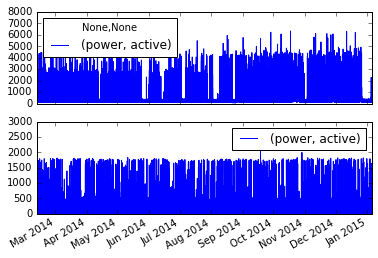

In [38]:
fig, ax = plt.subplots(nrows=2, sharex=True)
output.store['/building1/elec/meter1'][:'Jan 5 2015'].plot(label='Predicted', ax=ax[0])
train.buildings[1].elec['fridge freezer'].power_series_all_data()[:'Jan 5 2015'].plot(ax=ax[1])
plt.legend()


In [40]:
output.store['fridge freezer']

KeyError: 'No object named fridge freezer in the file'

In [41]:
print(output.store)

<class 'pandas.io.pytables.HDFStore'>
File path: output3.h5
/building1/elec/meter1             frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
/building1/elec/meter12            frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
/building1/elec/meter25            frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
/building1/elec/meter5             frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
/building1/elec/meter8             frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
/building1/elec/meter9             frame_table  (typ->appendable,nrows->471975,ncols->1,indexers->[index])
